# Importing Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset


In [142]:
df = pd.read_csv("hotels.csv")

# EDA and Data Cleaning

In [143]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [144]:
df.shape

(119390, 36)

In [145]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [147]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [149]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [150]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [151]:
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
    print('--'*50)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [152]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [153]:
df.drop(['company','agent'], axis=1, inplace = True)
df.dropna(inplace=True)

In [154]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [155]:
## to check outlier 
df.describe()  

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

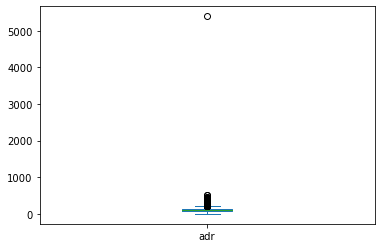

In [156]:
df['adr'].plot(kind='box')

<AxesSubplot:>

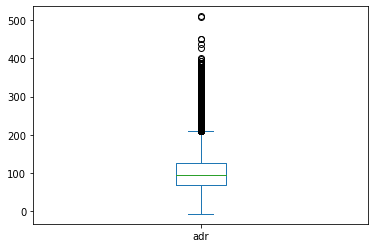

In [157]:
df= df[df['adr'] < 5000]
df['adr'].plot(kind='box')

# Data Analysis and Visualization

In [158]:
Cancelled_Perc= df['is_canceled'].value_counts(normalize=True)
Cancelled_Perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

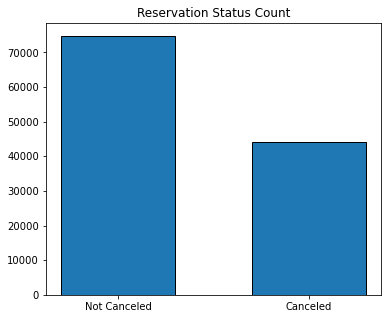

In [159]:
Cancelled_Perc= df['is_canceled'].value_counts(normalize=True)
print(Cancelled_Perc)
plt.figure(figsize=(6,5))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width= 0.6 )

In [160]:
df['is_canceled']=df['is_canceled'].astype(str)

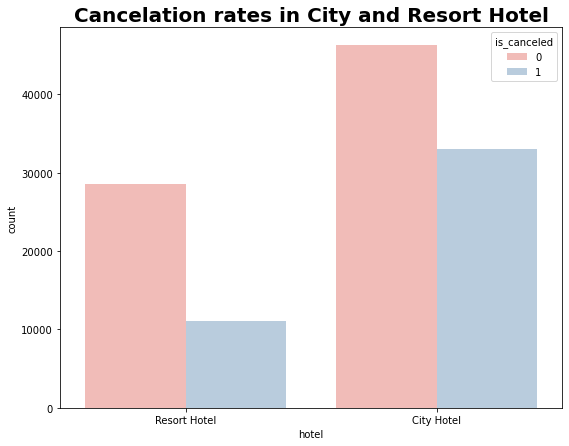

In [161]:
plt.figure(figsize=(9,7))
sns.countplot(x='hotel', hue = 'is_canceled', data = df, palette='Pastel1')
plt.title('Cancelation rates in City and Resort Hotel',fontweight='bold',size = 20)
plt.show()

In [162]:
## Most Booking were in City Hotel
## Cancelation in Resort Hotel is less compared to City Hotel

In [163]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [164]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [165]:
## دي كدا مقارنه بين معدل الحجز لكل فندق لوحده بحيث نشوف نسبة الالغاء اكتر ف انهي وفندق ونسبة الحجوزات اللي متلغتيش ف انهي فندق اكتر   

In [166]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [167]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


In [168]:
## هنرسم تشارت عشان نعرف منه النسبة بين (adr) ونسبة الحجوزات لكل فندق عشان نشوف الغاء الحجوزات دا سببه ارتفاع الاسعاء ولا السبب شيء اخر

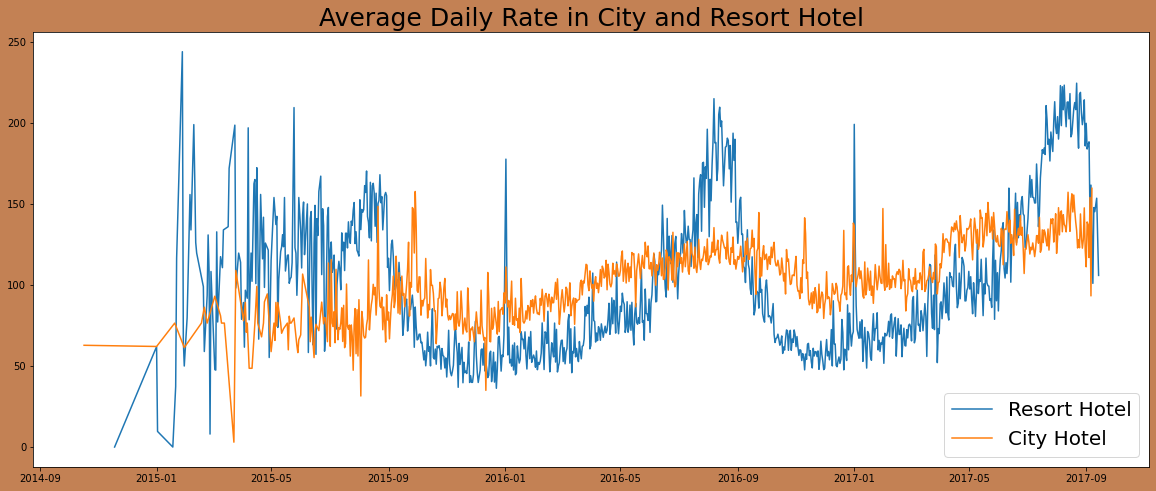

In [169]:
plt.figure(figsize=(20,8),facecolor='#C38154')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=25)
plt.plot(resort_hotel.index , resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index , city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

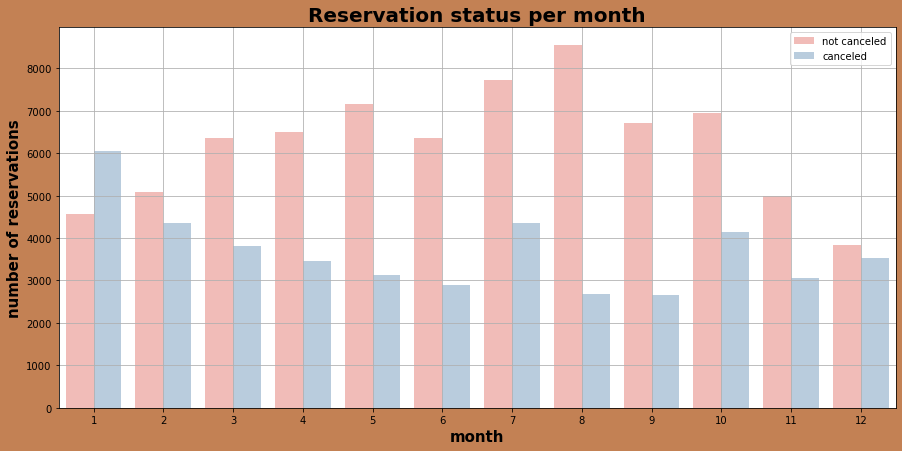

In [170]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(15,7),facecolor='#C38154')
sns.countplot(x = 'month', hue='is_canceled', data = df, palette='Pastel1')
plt.title('Reservation status per month',fontweight="bold", size=20)
plt.xlabel('month',fontweight="bold", size=15)
plt.ylabel('number of reservations',fontweight="bold", size=15)
plt.legend(['not canceled', 'canceled'])
plt.grid()
plt.show() 

In [171]:
## We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status.
## It's evident that the month of August stands out, having the highest numbers of both confirmed and canceled reservations.
## In contrast, January has the fewest confirmed reservations but the highest number of canceled reservations.

In [172]:
## هنجيب العلاقة بين الشهور ونسبة الغاء الحجوزات فيها عشان نشوف انهي اشهر فيها نسبة الغاء حجوزات اكتر بشكل اوضح 

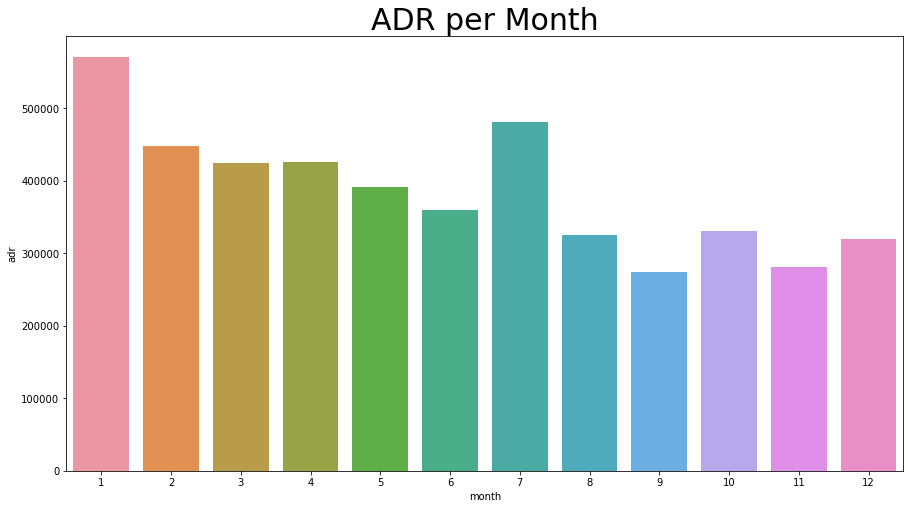

In [173]:
plt.figure(figsize=(15,8))
plt.title('ADR per Month', fontsize= 30)
data_for_fig = df[df['is_canceled']=='1'].groupby('month')['adr'].sum().reset_index()
## لاحظ اننا غيرنا الداتا تايب بتاع كولوم is canceled لاسترينج فوق 
sns.barplot(x= 'month', y= 'adr', data = data_for_fig)
plt.show()

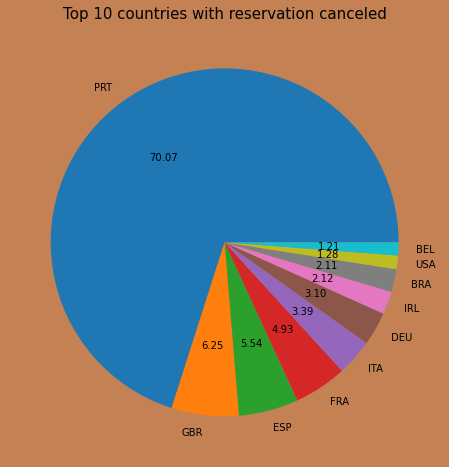

In [174]:
## هنجيب اكتر عشر دول ف إلغاء الحجوزات 
cancelled_data= df[df['is_canceled']=='1']
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8),facecolor = '#C38154')
plt.title('Top 10 countries with reservation canceled', color="black", fontsize = 15)
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()


In [175]:
df['market_segment'].value_counts(normalize=True)
#لحساب النسبة المئوية لكل طريقة حجز  

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

Let’s delve into an analysis of the various channels through which hotel reservations are being made, including Direct Bookings, Group Reservations, Online Travel Agencies (OTAs), and Offline Travel Agents. Notably, Online Travel Agencies account for approximately 47% of all bookings, making them the dominant source of reservations. Group bookings contribute a significant 16%, reflecting the popularity of collective travel arrangements. On the other hand, only 10% of clients opt for direct reservations by visiting the hotel in person, highlighting a shift away from traditional booking methods.

Key Insights: Online Travel Agencies (OTAs): 47% 
Group Bookings: 16% Direct Bookings (In-Person): 10%

In [176]:
cancelled_data= df[df['is_canceled']=='1']
booking_data= df[df['is_canceled']=='0']
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [177]:
booking_data['market_segment'].value_counts(normalize=True)

Online TA        0.477142
Offline TA/TO    0.212482
Direct           0.140852
Groups           0.103137
Corporate        0.055295
Complementary    0.008616
Aviation         0.002475
Name: market_segment, dtype: float64

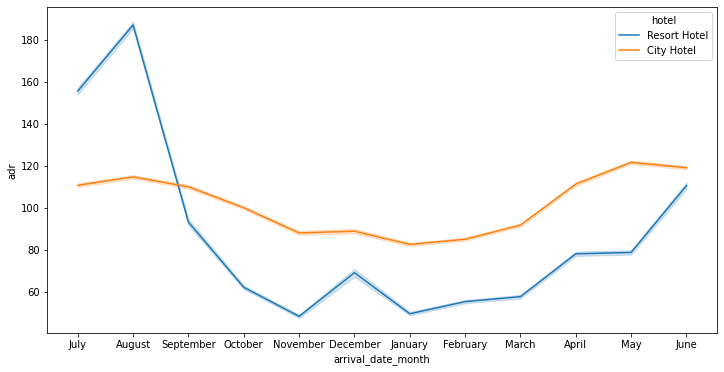

In [178]:
## هشوف الاسعار بالنسبة لكل شهر لكل فندق ممكن نطلع منها بمعلومة 

plt.figure(figsize=(12, 6))
sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = df)
plt.show()

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

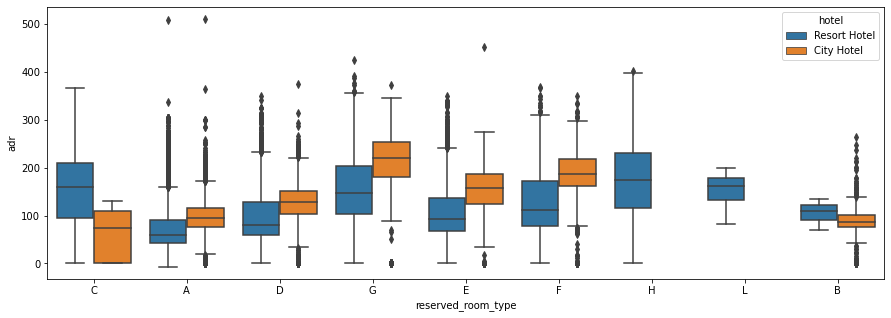

In [183]:
import plotly.express as px
data = df[df['is_canceled'] == '0']
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x = 'reserved_room_type',y = 'adr', hue= 'hotel')

The two hotels offer a variety of room types and meal plan options, which contribute to differences in pricing. Additionally, seasonal factors play a significant role, leading to substantial fluctuations in rates throughout the year.

# Analysis and Findings

Suggestions:

Mitigate Cancellations Through Pricing Adjustments:
Increasing prices are often associated with a higher rate of cancellations. To reduce reservation cancellations, hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts to customers.

Launch Marketing Campaigns in January:
During the month of January, when cancellations tend to peak, hotels can launch marketing campaigns with attractive offers to boost revenue and counteract the high cancellation rates during this period.

Address No-Deposit Policies with Stricter Fees:
We also realize that the high rate of cancellations can be due to lenient no-deposit policies. To address this, stricter withdrawal and cancellation fees should be charged to minimize last-minute cancellations and encourage commitment from guests.

By implementing these measures, hotels can better manage cancellations and improve overall performance.